<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/ProcessamentoDeImagem/ProcessamentoDeImagemAulaI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# **Imagem Original**

In [ ]:
img = cv2.imread('/content/megaman-2.png')

In [7]:
def print_img(img):
  #Display the image
  cv2_imshow(img)
  #key binding function
  cv2.waitKey(0)
  #Destroyed all window we created earlier.
  cv2.destroyAllWindows()

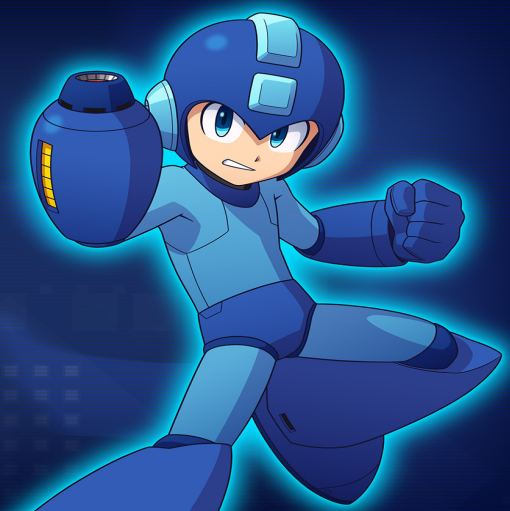

In [ ]:
print_img(img)

## **Imagem em tons de cinza**

Para cada pixel da imagem utiliza a seguinte equal para os tons de rgb

I = `r * 0.299 + g * 0.587 + b * 0.114`


In [18]:
def gray_tone(array):
  return (array[0] * 0.299 + array[1] * 0.587 + array[2] * 0.114)

In [16]:
def image_cinza(imagem):
  new_img = imagem
  for index_img,img_array in enumerate(imagem):
    for index_pixel,pixel in enumerate(img_array):
      new_img[index_img][index_pixel] = gray_tone(pixel)
  return new_img

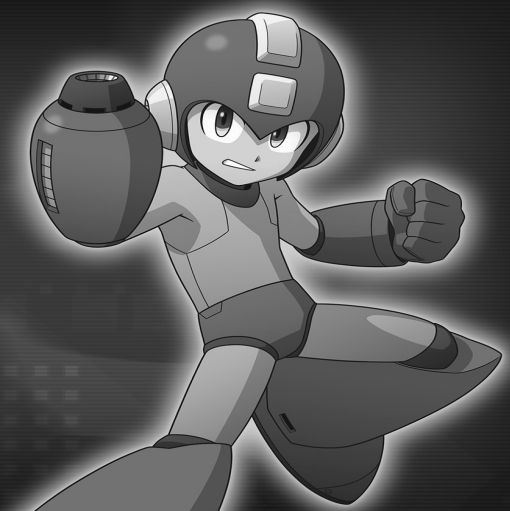

In [ ]:
print_img(image_cinza(img))

## **Imagem Negativa**

Busca a imagem original, e modifica os valores rgb para -255 rgb
I = 255 - I


In [ ]:
def negativa_pixel(array):
  return (255 - array[0], 255 - array[1], 255 - array[2])

In [ ]:
new_img_negativa = cv2.imread('/content/megaman-2.png')
for index_img,img_array in enumerate(img):
  for index_pixel,pixel in enumerate(img_array):
    new_img_negativa[index_img][index_pixel] = negativa_pixel(pixel)

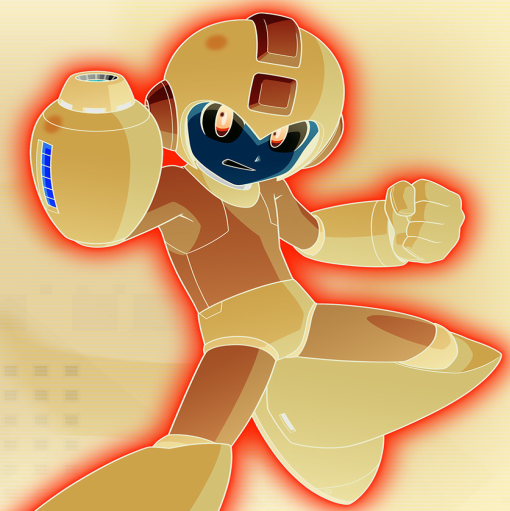

In [ ]:
print_img(new_img_negativa)

## **Imagem Limiarizada**

Recebe uma imagem já passado pelo filtro de tons de cinza e utiliza a equação



    p(x,y) =  { 1 se p(x,y) > L
              { 0 , caso contrário

Utilizando L como 30

In [19]:
def limiar(pixel):
  if (pixel > 30):
    return 255
  return 0

In [26]:
new_img_limiar = image_cinza(cv2.imread('/content/megaman-2.png'))
for index_img,img_array in enumerate(new_img_limiar):
  for index_pixel,pixel in enumerate(img_array):
    for rgb_index,rgb in enumerate(pixel):
      new_img_limiar[index_img][index_pixel] = limiar(rgb)

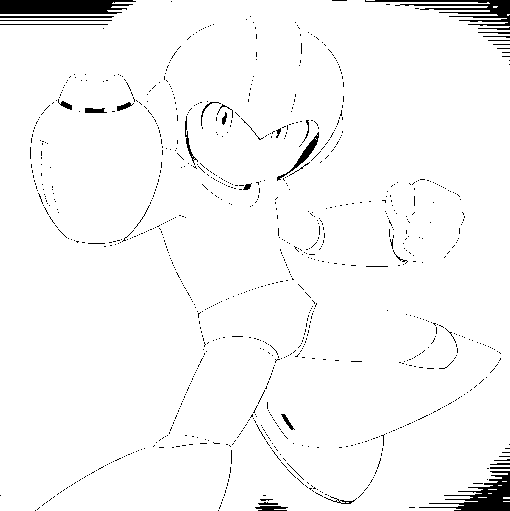

In [27]:
print_img(new_img_limiar)

## **Imagens Adicionadas**

Pegando uma imagem e somando as duas para transformar em uma só.
Na primeira imagem fui utilizado a formula:

```
I = (I1 + I2) / 2
```

Na segunda imagem foi utilizada a seguinte formula:
```
I = (I1 * p1 + I2 * p2)
```
Onde p1 + p2 = 1




In [38]:
img = cv2.imread('/content/megaman.png')
img2 = cv2.imread('/content/megaman-2.png')
blank_image = np.zeros((512,512,3), np.uint8)
for index_img,img_array in enumerate(img2):
  for index_pixel,pixel in enumerate(img_array):
    blank_image[index_img][index_pixel] = (img[index_img][index_pixel] + img2[index_img][index_pixel]) / 2


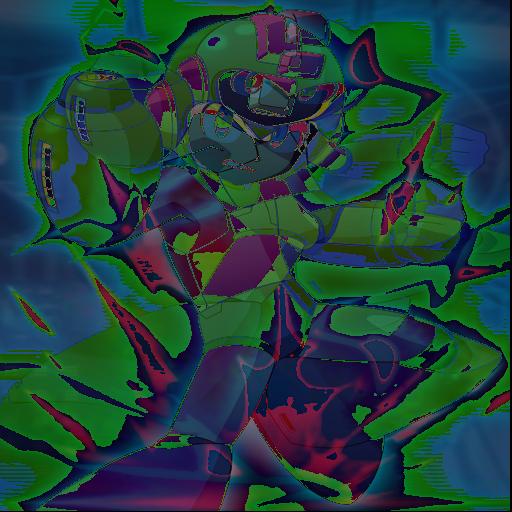

In [39]:
print_img(blank_image)

In [42]:
img = cv2.imread('/content/megaman.png')
img2 = cv2.imread('/content/megaman-2.png')
blank_image = np.zeros((512,512,3), np.uint8)
for index_img,img_array in enumerate(img2):
  for index_pixel,pixel in enumerate(img_array):
    blank_image[index_img][index_pixel] = img[index_img][index_pixel] * 0.6 + img2[index_img][index_pixel] * 0.4


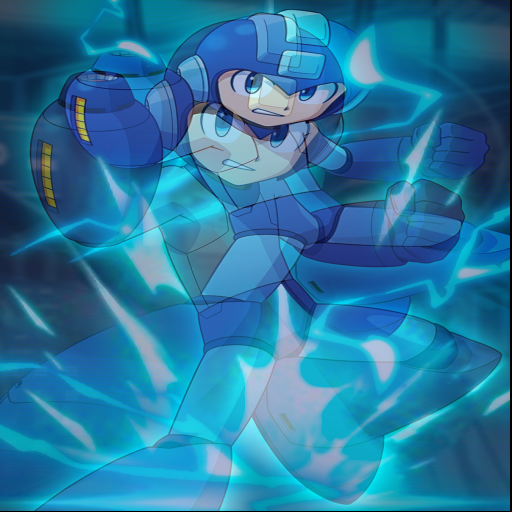

In [43]:
print_img(blank_image)

## Subtração de imagens

Para a subtração de imagem fui utilizada a seguinte formula:

```
I = I1 - I2
```
Na subtração de imagem, oq está em ambas terá o fundo preto.


In [64]:
img = cv2.imread('/content/imageWithGlasses.jpg')
img2 = cv2.imread('/content/imageWithoutPerson.jpg')
blank_image = np.zeros((242,240,3), np.uint8)
for index_img,img_array in enumerate(img):
  for index_pixel,pixel in enumerate(img_array):
    blank_image[index_img][index_pixel] = img[index_img][index_pixel] - img2[index_img][index_pixel]

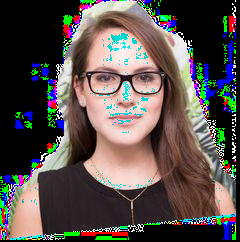

In [65]:
print_img(blank_image)